# Зачетная работа 
*Соколов Кирилл Денисович* 

#  Численное интегрирование. Светимость черного тела

1.Построить для Солнца график зависимости 𝜑(𝜆,𝑇) от 𝜆.

2.Вычислить светимость Солнца на видимой области длин волн.

3.Вычислить светимость Солнца для всех длин волн.

4.Найти светимость Солнца с помощью закона Стефана - Больцмана.

5.Найти солнечную постоянную.

6.Результаты сравнить с данными из литературы.

7.Сделать выводы.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

## график зависимости 𝜑(𝜆,𝑇) от 𝜆.

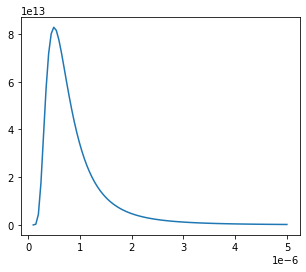

In [9]:
plt.figure(figsize = (5,4))
h = 6.6261e-34
c = 2.9979e8
k = 1.3806e-23
R_sun = 6.957e8
T_eff = 5778
x = np.linspace(1*10**-7,50*10**-7,100)
y = (2*np.pi*h*c**2)/(x**5*(np.e**((h*c)/(x*k*T_eff)) - 1))
plt.plot(x, y)
plt.show()
pass

# 2 Светимость Солнца на видимой области длин волн

С помощью численного интегрирования найдем светимость Солнца
на видимой области длин волн, т.\,е. для $\lambda$ в диапазоне от 
$\lambda_1 = 3.5\times 10^{-7}$ до $\lambda_2 = 7\times 10^{-7}$.

необходимо найти интеграл
$$
R(\lambda_1,\lambda_2,T) = \int_{\lambda_1}^{\lambda_2} \varphi(\lambda, T) d\lambda.
$$

In [11]:
n = 100
a = 3.5e-7
b = 7e-7
hh = (b - a)/n
x = np.arange(a + hh/2, b, hh)
y = (2*np.pi*h*c**2)/((x**5)*(np.exp((h*c)/(x*k*T_eff))-1))

I_rect = hh*sum(y)
I_trapz = integrate.trapz(y, x)
I_simps = integrate.simps(y, x)
print(I_simps, I_trapz, I_rect)

26239611.853874594 26239134.004388954 26456374.429090705


## 3 Светимость Солнца для всех длин волн через несобственный интеграл

In [12]:
def integrand (x):
  return (2*np.pi*h*c**2)/(x**5*(np.e**((h*c)/(x*k*T_eff)) - 1))

In [14]:
integrated = integrate.quad(integrand, 0, np.inf)[0]
L = 4 * np.pi * R_sun**2 * integrated
L

<ipython-input-14-5a6c6db1ae3f>:1: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integrated = integrate.quad(integrand, 0, np.inf)[0]


3.827881358837864e+26

## 4. Закон Стефана-Больцмана

Найдем светимость Солнца с помощью закона *Стефана–Больцмана*

In [38]:
sigma = 5.67e-8 
L = 4 * np.pi * R_sun**2 * sigma * T_eff**4
L

3.846994382781468e+26

## 5 Солнечная постоянная

Считая Солнце чёрным телом, оценим энергию, приходящую от него на единичную площадку в окрестности Земли. Расстояние r между Землёй и Солнцем примем равным :

In [20]:
a_u = 1.496e11
S = L / (4 * np.pi * (a_u)**2)
S

1361.0855325171206

## 6 Сравнение результатов с данными из литературы

Данные из википедии: Солнечная светимость L = 3.827 * 10^26 (Вт); Солнечная постоянная E = 1367 (Вт/м^2).

Результаты полученные в ходе работы:

1.Светимость солнца на видимой области длин волн: 26239611.853 (Вт); данные про этот интеграл не удалось найти в литературе.

2.Светимость Солнца найденная с помощью закона Стефана-Больцмана: 3.846 * 10^26 (Вт).

3.Светимость Солнца найденная с помощью несобстевнного интеграла: 3.827 * 10^26 (Вт).

4.Солнечная постоянная: 1361.085 (Вт/м^2)

## 7 Выводы

1.С учетом погрешности вычисленные результаты почти совпадают с результатами из литературы.

2.Вычисленния с помощью несобственного интеграла дали более точный результат.

3.Метод трапеций и метод Симпсона более точно вычисляют определенный интеграл.